In [1]:
#libration_frequency.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 March 2018.
#plot phase-space diagrams for ringlets librating about their fixed point

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [3]:
#restore output
parent_folders = [
    'narrow_ring/ring_mass_1.5e-11/', 'narrow_ring/ring_mass_2.4e-11/', 'narrow_ring/ring_mass_3.7e-11/', 
    'narrow_ring/ring_mass_6.5e-11/', 'narrow_ring/ring_mass_1.3e-10/', 'narrow_ring/ring_mass_2.5e-10/', 
    'narrow_ring/ring_mass_5.0e-10/', 'narrow_ring/ring_mass_1.0e-9/', 'narrow_ring/ring_mass_2.0e-9/',
]
parent_folders = [
    'narrow_ring/ring_mass_1.5e-11/', 'narrow_ring/ring_mass_2.4e-11/', 'narrow_ring/ring_mass_3.7e-11/', 
    'narrow_ring/ring_mass_6.5e-11/', 'narrow_ring/ring_mass_1.3e-10/', 'narrow_ring/ring_mass_2.5e-10/', 
    'narrow_ring/ring_mass_5.0e-10/', 'narrow_ring/ring_mass_1.0e-9/', 'narrow_ring/ring_mass_2.0e-9/',
]
total_ring_masses = []
da_list = []
de_list = []
dwt_list = []
a_avg_list = []
e_avg_list = []
omega_bgt_list = []
omega_list = []
from helper_fns import *
from libration import *
for parent_folder in parent_folders:
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    print 'r.shape = ', r.shape
    print 'total_ring_mass = ', total_ring_mass
    total_ring_masses += [total_ring_mass]
    #calculate differences da, de, dwt between outer & inner streamline's periapse
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    da_list += [da]
    de_list += [de]
    dwt_list += [dwt]
    a_avg_list += [a_mean]
    e_avg_list += [e_mean]
    #BGT libration period
    GM = 1.0
    M_central = 1.0
    a3 = (a_mean**3).mean()
    a_over_da = (a_mean/da).mean()
    n = np.sqrt(GM/a3)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    H_avg = np.median(H)
    omega_bgt = (total_ring_mass/M_central)*(a_over_da**2)*n*H_avg/np.pi
    omega_bgt = (total_ring_mass/M_central)*(a_over_da**2)*n*H_avg/np.pi
    omega_bgt_list += [omega_bgt]
    print 'H_avg = ', H_avg
    print 'q_avg = ', np.sqrt(q.mean())
    print 'BGT libration frequency = ', omega_bgt
    #compute libration phase & frequency
    de_eq = np.median(de)
    dwt_eq = np.median(dwt)
    Ix = (de - de_eq)*a_mean/da
    Iy = e_mean*a_mean*(dwt - dwt_eq)/da
    phase = np.arctan2(Iy, Ix)
    phase_unwrapped = unwrap_angle(phase)
    coeff = np.polyfit(times, phase_unwrapped, 1)
    omega = coeff[0]
    omega_list += [omega]
    print 'sim libration frequency = ', omega

reading output in folder =  narrow_ring/ring_mass_1.5e-11/output
r.shape =  (1001, 2, 241)
total_ring_mass =  1.5e-11
H_avg =  1.7837343504387717
q_avg =  0.9574253631764889
BGT libration frequency =  3.4080536582721844e-05
sim libration frequency =  9.944945467365374e-05
reading output in folder =  narrow_ring/ring_mass_2.4e-11/output
r.shape =  (1001, 2, 241)
total_ring_mass =  2.4e-11
H_avg =  1.2120941058982566
q_avg =  0.9194904631663363
BGT libration frequency =  3.705360972575483e-05
sim libration frequency =  8.014664029062854e-05
reading output in folder =  narrow_ring/ring_mass_3.7e-11/output
r.shape =  (1001, 2, 241)
total_ring_mass =  3.7e-11
H_avg =  0.9060856112902128
q_avg =  0.864722672973829
BGT libration frequency =  4.2699958329935345e-05
sim libration frequency =  7.168920637389395e-05
reading output in folder =  narrow_ring/ring_mass_6.5e-11/output
r.shape =  (1001, 2, 241)
total_ring_mass =  6.5e-11
H_avg =  0.6706974570847002
q_avg =  0.7556613095997272
BGT libra

In [4]:
#libration period
omega = np.array(omega_list)
T_lib = 2.0*np.pi/omega
omega_bgt = np.array(omega_bgt_list)
T_lib_bgt = 2.0*np.pi/omega_bgt
ring_masses = np.array(total_ring_masses)

In [5]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

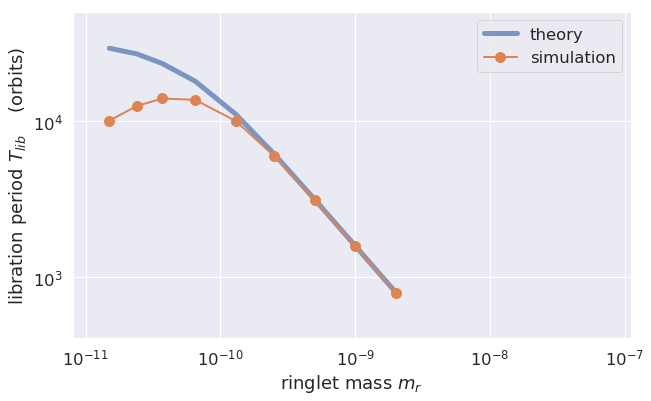

In [6]:
#plot T_lib vs total_ring_masses
x = ring_masses
y = T_lib_bgt/(2*np.pi)
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=5, label='theory', alpha=0.7)
y = T_lib/(2*np.pi)
p = ax.plot(x, y, marker='o', markersize=10, linestyle='-', linewidth=2, label='simulation')
p = ax.set_xlabel(r'ringlet mass $m_r$')
p = ax.set_ylabel(r'libration period $T_{lib}$    (orbits)')
p = ax.set_xlim(8.0e-12, 1.1e-7)
p = ax.set_ylim(4.0e2, 5.0e4)
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = plt.legend()
plt.savefig('figs/libration.pdf', bbox_inches='tight')